In [1]:
import pandas as pd
import numpy as np
import Higgs
from Higgs import predictions as HP
from Higgs.tools.ImplementationUtils import implementChannelLimit, fromHB5Table1
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## h125 > inv combination 7+8+13TeV [1809.05937](https://arxiv.org/abs/1809.05937)

In [2]:
df = pd.DataFrame({"m": [125], "obs": [0.19], "exp": [0.15]})

prods = ["H", "vbfH", "HZ", "HW"]
limitFile = implementChannelLimit(
    1694380,
    {"channels": [[x, "inv"] for x in prods]},
    "Fig. 9 (combined)",
    df,
    idSuffix=1,
    luminosity=4.9 + 19.7 + 38.2,  # 7 + 8 + 13 TeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[x, "none"] for x in prods]},
    },
    massResolution=resolution.inv["default"],
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[x, "none"] for x in prods]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("directInv", df.exp[0] - h.br("inv"))
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("directInv", 0)
h.setBr("directInv", df.obs[0] - h.br("inv"))
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to comb_LHC13_CMS_63.json


## hSM > inv combination [1809.05937](https://arxiv.org/abs/1809.05937)

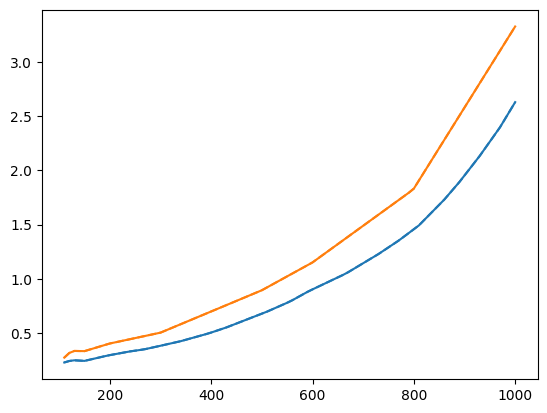

Looks good. Saving this to comb_LHC13_CMS_36.json
using effective coupling input for SM-normalized limit
assuming only production is normalized for inv decay


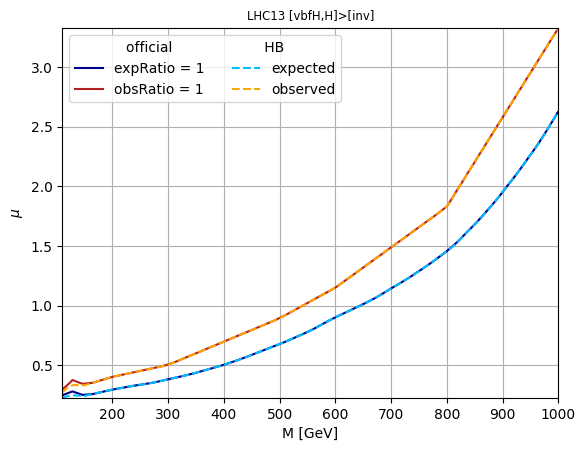

In [3]:
df = fromHB5Table1("59372_CMS_H-inv_38.2fb-1", "CMS")
prods = ["H", "vbfH"]
limitFile = implementChannelLimit(
    1694380,
    {"channels": [[x, "inv"] for x in prods]},
    "Fig. 7 (left)",
    df,
    idSuffix=2,
    luminosity=35.9,  # 13 TeV only
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[x, "none"] for x in prods]},
    },
    massResolution=resolution.inv["default"],
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[x, "none"] for x in prods]},
    },
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV LHC

## CMS `vbfH > inv` full Run1 [1404.1344](https://arxiv.org/abs/1404.1344)


Multiple different luminosity values: [19.7, 4.9] using 19.7 unless you set it manually


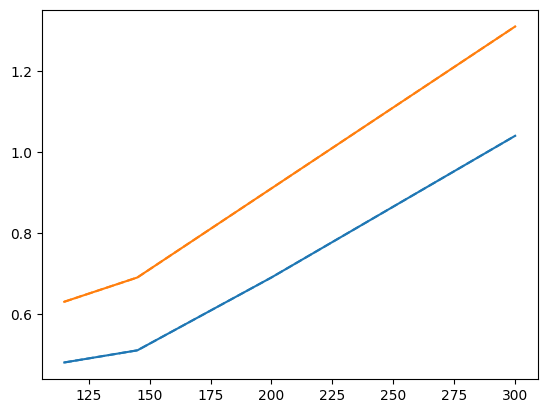

Looks good. Saving this to vbfH_LHC8_CMS_20.json
using effective coupling input for SM-normalized limit
assuming only production is normalized for inv decay


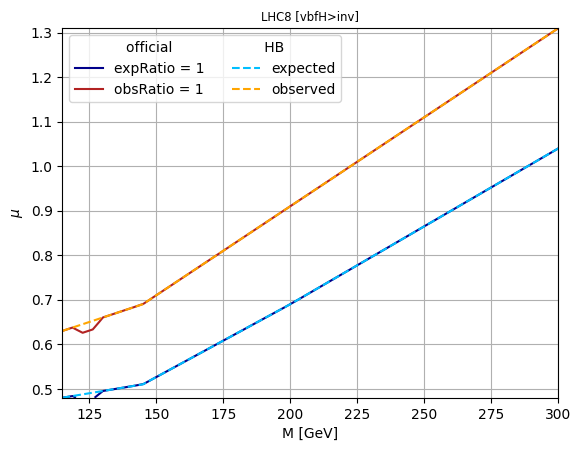

In [4]:
df = pd.DataFrame(
    {
        "m": [115, 125, 135, 145, 200, 300],
        "obs": [0.63, 0.65, 0.67, 0.69, 0.91, 1.31],
        "exp": [0.48, 0.49, 0.5, 0.51, 0.69, 1.04],
    }
)
limitFile = implementChannelLimit(
    "1404.1344",
    {"channels": [["vbfH", "inv"]]},
    "Fig. 10/Tab. 9",
    df,
    idSuffix=1,
    luminosity=19.5,
    normalization={"reference": "SMHiggsInterp", "process": {"channels": [["vbfH", "none"]]}},
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS `ZH > inv` full Run1 [1404.1344](https://arxiv.org/abs/1404.1344)

Multiple different luminosity values: [19.7, 4.9] using 19.7 unless you set it manually


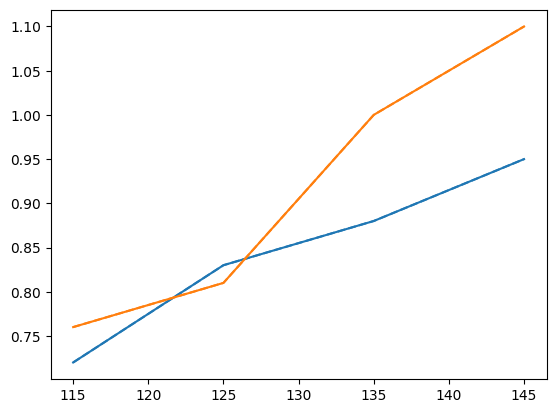

Looks good. Saving this to HZ_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit
assuming only production is normalized for inv decay


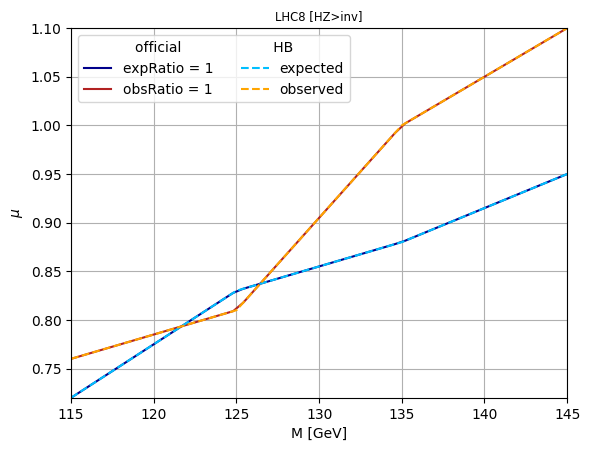

In [5]:
df = pd.DataFrame(
    {
        "m": [115, 125, 135, 145],
        "obs": [0.76, 0.81, 1.0, 1.1],
        "exp": [0.72, 0.83, 0.88, 0.95],
    }
)

limitFile = implementChannelLimit(
    "1404.1344",
    {"channels": [["HZ", "inv"]]},
    "Fig. 11/Tab. 9",
    df,
    idSuffix=2,
    luminosity=19.5 + 4.9,
    normalization={"reference": "SMHiggsInterp", "process": {"channels": [["HZ", "none"]]}},
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## CMS `vbfH/ZH > inv` full Run1 [1404.1344](https://arxiv.org/abs/1404.1344)


Multiple different luminosity values: [19.7, 4.9] using 19.7 unless you set it manually


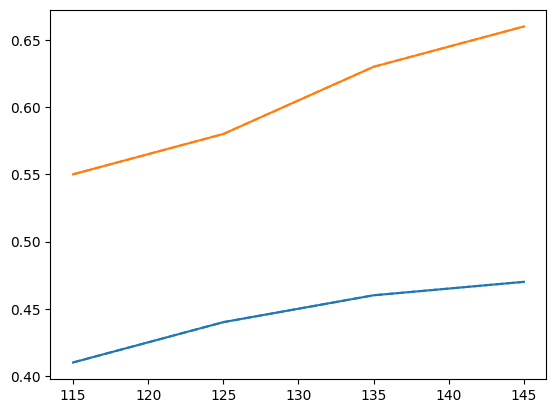

Looks good. Saving this to comb_LHC8_CMS_25.json
using effective coupling input for SM-normalized limit
assuming only production is normalized for inv decay


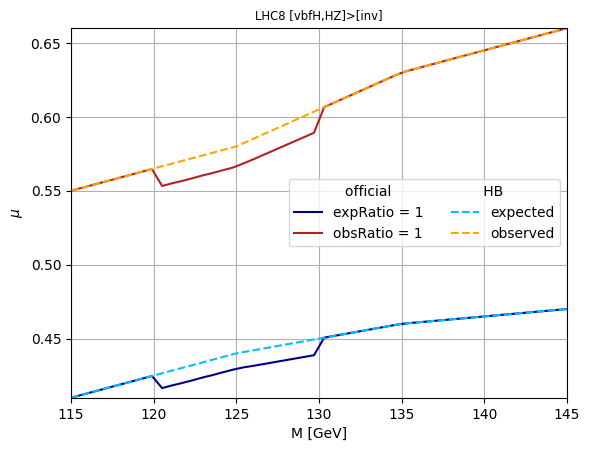

In [6]:
df = pd.DataFrame(
    {
        "m": [115, 125, 135, 145],
        "obs": [0.55, 0.58, 0.63, 0.66],
        "exp": [0.41, 0.44, 0.46, 0.47],
    }
)

limitFile = implementChannelLimit(
    "1404.1344",
    {"channels": [["HZ", "inv"], ["vbfH", "inv"]]},
    "Fig. 11/Tab. 9",
    df,
    idSuffix=3,
    luminosity=19.7 + 4.9,
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [["HZ", "none"], ["vbfH", "none"]]},
    },
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [["HZ", "none"], ["vbfH", "none"]]},
    },
    massResolution=resolution.inv["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
